# Analysing a dataset

This project is about analyzing data on movie review scores. 

The dataset is stored in the *fandango_score_comparison.csv* file. It contains information on how major movie review services rated movies. The data originally came from FiveThirtyEight.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import scipy.stats as stats
%matplotlib inline

movies = pd.read_csv('data/fandango_score_comparison.csv')
movies.head(3)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


Each row represents a single movie. Each column contains information about how the online moview review services RottenTomatoes, Metacritic, IMDB, and Fandango rated the movie.

To make it easier to compare scores across services, the columns were normalized so their scale and rounding matched the Fandango ratings. Any column with the suffix _norm is the corresponding column changed to a 0-5 scale. 

Let us focus on the Metacritic_norm_round and the Fandango_Stars columns, which will let us see how Fandango and Metacritic differ in terms of review scores.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54813dfda0>]], dtype=object)

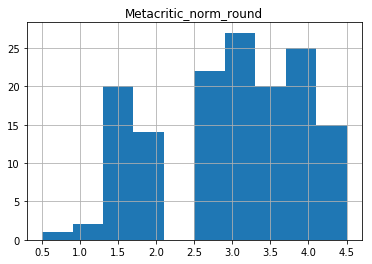

In [2]:
movies.hist(column = 'Metacritic_norm_round')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f547e029a58>]], dtype=object)

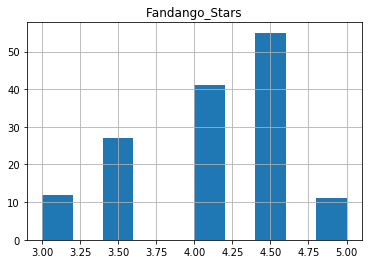

In [3]:
movies.hist(column = 'Fandango_Stars')

The scores in Metacritic spread over a larger range (from 0.5 up to 4.5) than the scores from Fandango Stars which start from 3.0 to 5.0. Low scores do not exist in Fandango Stars.
To compare the highest frequency score, we can see that in Metacritic, it is 3 which is lower than Fandango's which is 4.5.

## Quantifying these differences with metrics 

Metrics include the mean, median and standard deviation.

In [4]:
mean_Meta = movies['Metacritic_norm_round'].mean()
mean_Fandango = movies['Fandango_Stars'].mean()
print('Mean of Metacritics scores', mean_Meta)
print('Mean of Fandango scores', mean_Fandango)


Mean of Metacritics scores 2.9726027397260273
Mean of Fandango scores 4.089041095890411


In [5]:
median_Meta = movies['Metacritic_norm_round'].median()
median_Fandango = movies['Fandango_Stars'].median()
print('Median of Metacritic scores', median_Meta)
print('Median of Fandango scores', median_Fandango)

Median of Metacritic scores 3.0
Median of Fandango scores 4.0


The median metacritic score appears higher than the mean metacritic score because a few very low reviews "drag down" the mean. 

The median fandango score is lower than the mean fandango score because a few very high ratings "drag up" the mean.

In [6]:
std_Meta = movies['Metacritic_norm_round'].std()
std_Fandango = movies['Fandango_Stars'].std()
print('Standard deviation of Metacritics', std_Meta)
print('Standard deviation of Fandango', std_Fandango)

Standard deviation of Metacritics 0.9909605613743364
Standard deviation of Fandango 0.5403859779787333


The standard deviation (for a sample or population) is an indicator of how "near/dense" the data are relative to the mean. A small standard deviation indicates that the data are near the mean, large standard deviation indicates that the data are more dispersed.

Fandango ratings appear clustered between 3 and 5, and have a much narrower standard deviation than Metacritic reviews, which go from 0 to 5. The data are more dispersed in Metacritics.

Fandango ratings in general appear to be higher than metacritic ratings.
These may be due to movie studio influence on Fandango ratings, and the fact that Fandango calculates its ratings in a hidden way.

## Findind which movies tend to be the largest outliers.

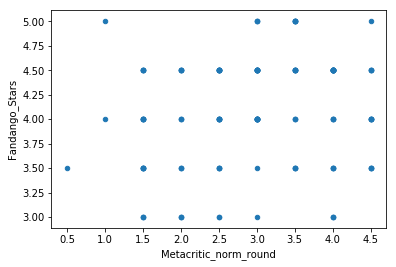

In [7]:
movies.plot.scatter(x='Metacritic_norm_round', y='Fandango_Stars')

Several movies appear to have low ratings in Metacritic and high ratings in Fandango, or vice versa. 
E.g., the movie rated with the lowest score in Metacritic, i.e. 0.5, is rated 3.5 in Fandango...

* Let us explore this further, finding the differences between the columns.

In [8]:
fm_diff = movies['Metacritic_norm_round'] - movies['Fandango_Stars']
movies['fm_diff'] = numpy.abs(fm_diff)

Getting the absolute value will ensure that we look at any extreme case where Metacritic_norm_round is much greater or much lower than Fandango_Stars.

* Let us sort movies based on the fm_diff column, in descending order

In [9]:
movies = movies.sort_values(by='fm_diff', ascending=False)

* Let us Print out the top 5 movies with the biggest differences

In [10]:
movies[['FILM', 'Fandango_Stars', 'Metacritic_norm_round', 'fm_diff']].head(5)

,FILM,Fandango_Stars,Metacritic_norm_round,fm_diff
3,Do You Believe? (2015),5.0,1.0,4.0
85,Little Boy (2015),4.5,1.5,3.0
47,Annie (2014),4.5,1.5,3.0
19,Pixels (2015),4.5,1.5,3.0
134,The Longest Ride (2015),4.5,1.5,3.0


## Measuring the correlation between Fandango_Stars and Metacritic_norm_round 

Let us see what the correlation coefficient between Fandango_Stars and Metacritic_norm_round is. This will help to determine if Fandango consistently has higher scores than Metacritic, or if only a few movies were assigned higher ratings.



In [11]:
r, p = stats.pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
print(r)

0.178449190739


The low correlation between Fandango and Metacritic scores indicates that Fandango scores aren't just inflated, they are fundamentally different. For whatever reason, it appears like Fandango both inflates scores overall, and inflates scores differently depending on the movie.

In [12]:
slope, intercept, r_value, p_value, stderr_slope = stats.linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

## Creating a linear regression

Using the scipy.stats.linregress function, we can create a linear regression with Metacritic_norm_round as the x-values and Fandango_Stars as the y-values.

Let us predict what a movie that got a 3.0 in Metacritic would get on Fandango using the formula pred_3 = slope * 3 + intercept

In [13]:
pred_3 = slope * 3 + intercept
pred_3

4.0917071528212041

Let us draw the linear regression on our scatter plot:

(1, 5)

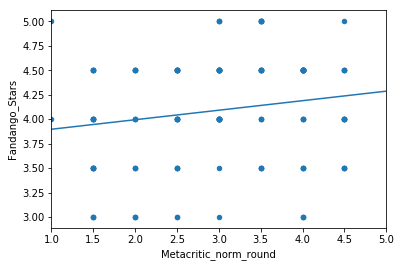

In [14]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept
#plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
#plt.plot([1,5],[pred_1,pred_5])
#plt.xlim(1,5)
#plt.show()

ax = movies.plot.scatter(x='Metacritic_norm_round', y='Fandango_Stars')
ax.plot([1,5],[pred_1,pred_5])
ax.set_xlim([1,5])

> Since our correlation coefficient is low, we can see from the graph that predicting Fandango scores from Metacritic scores using linear regression is **not relevant**.

## Plotting using Seaborn: Comparing IMDB scores and Metacritic scores:

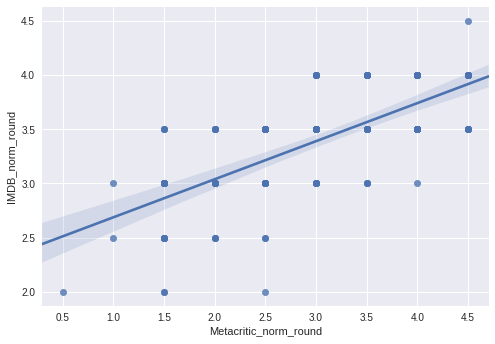

In [16]:
import seaborn as sns
sns.regplot(x='Metacritic_norm_round', y='IMDB_norm_round', data=movies);

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model and plot the resulting regression line and a 95% confidence interval for that regression.

A few other seaborn functions use regplot() in the context of a larger, more complex plot including the jointplot() function. In addition to the plot styles, jointplot() can use regplot() to show the linear regression fit on the joint axes by passing kind="reg" as 

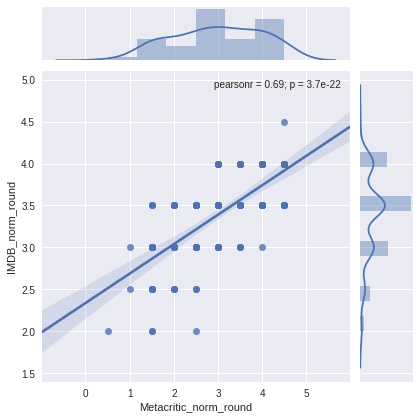

In [17]:
sns.jointplot(x='Metacritic_norm_round', y='IMDB_norm_round', data=movies, kind="reg");

> We can see IMDB scores are much more correlated to Metacritic scores than Fandango's. Thus, predicting IMDB scores from Metacritic scores using the linear regression makes sense.